In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('C:/Users/jefft/Desktop/medical_raw_data.csv', index_col=0)


In [3]:
#Investigating Data info after 
df.info

<bound method DataFrame.info of        CaseOrder Customer_id                           Interaction  \
1              1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
2              2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
3              3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
4              4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
5              5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...          ...         ...                                   ...   
9996        9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9997        9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9998        9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9999        9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
10000      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5   

                                    UID          City State        County  \
1      3a83ddb66e2ae73798bdf1d705dc0932           

In [4]:
#A better look
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Education

In [5]:
table = pd.crosstab(df.ReAdmis, df.Anxiety)
print(table)


Anxiety   0.0   1.0
ReAdmis            
No       3872  1838
Yes      2238  1068


In [6]:
chi = stats.chi2_contingency(table)
print(chi)


Chi2ContingencyResult(statistic=0.008091641908989988, pvalue=0.9283241235292173, dof=1, expected_freq=array([[3869.57630878, 1840.42369122],
       [2240.42369122, 1065.57630878]]))


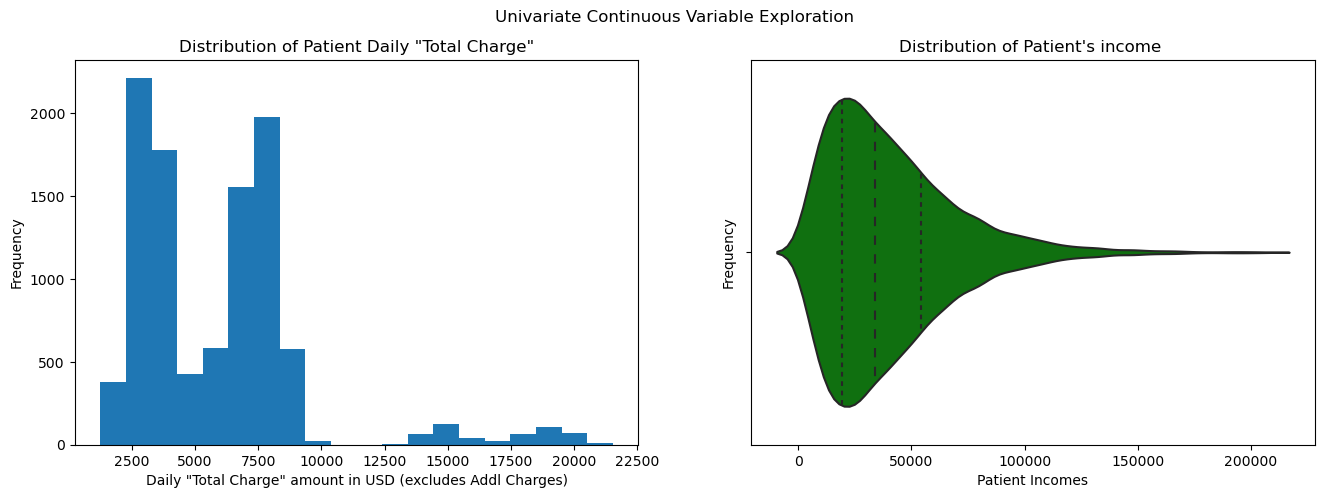

In [7]:
plt.figure(figsize = [16,5])
plt.suptitle("Univariate Continuous Variable Exploration")

# left plot: Univariate  TotalCharge 
plt.subplot(1, 2, 1)
plt.title('Distribution of Patient Daily "Total Charge"')
plt.hist(data=df, x="TotalCharge", bins = 20)
plt.xlabel('Daily "Total Charge" amount in USD (excludes Addl Charges)')
plt.ylabel("Frequency");

# right: Univariate  Income 
plt.subplot(1, 2, 2)
plt.title("Distribution of Patient's income ")
sns.violinplot(data=df, x="Income", color="green", inner="quartile")
plt.xlabel("Patient Incomes")
plt.ylabel("Frequency");

In [8]:
df.TotalCharge.value_counts()

TotalCharge
3191.048774     1
7329.393066     1
8498.290160     1
8451.833926     1
7530.770634     1
               ..
2065.518265     1
3409.593273     1
15289.590000    1
4383.419018     1
8700.856021     1
Name: count, Length: 10000, dtype: int64

In [9]:
df.TotalCharge.value_counts().sort_index()


TotalCharge
1256.751699     1
1284.510091     1
1336.966455     1
1348.112878     1
1358.068477     1
               ..
20562.041230    1
20632.441850    1
20647.386020    1
20673.966310    1
21524.224210    1
Name: count, Length: 10000, dtype: int64

In [10]:
df.TotalCharge.describe()

count    10000.000000
mean      5891.538261
std       3377.558136
min       1256.751699
25%       3253.239465
50%       5852.250564
75%       7614.989701
max      21524.224210
Name: TotalCharge, dtype: float64

In [11]:
df.Income.value_counts()

Income
14572.40    2
37132.97    2
55506.92    2
20474.03    2
26915.85    2
           ..
35093.92    1
41900.29    1
13511.95    1
34015.88    1
62682.63    1
Name: count, Length: 7531, dtype: int64

In [12]:
df.Income.value_counts().sort_index()

Income
154.08       1
300.79       1
395.23       1
401.86       1
493.04       1
            ..
197576.18    1
197675.05    1
203774.65    1
204542.41    1
207249.13    1
Name: count, Length: 7531, dtype: int64

In [13]:
df.Income.describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

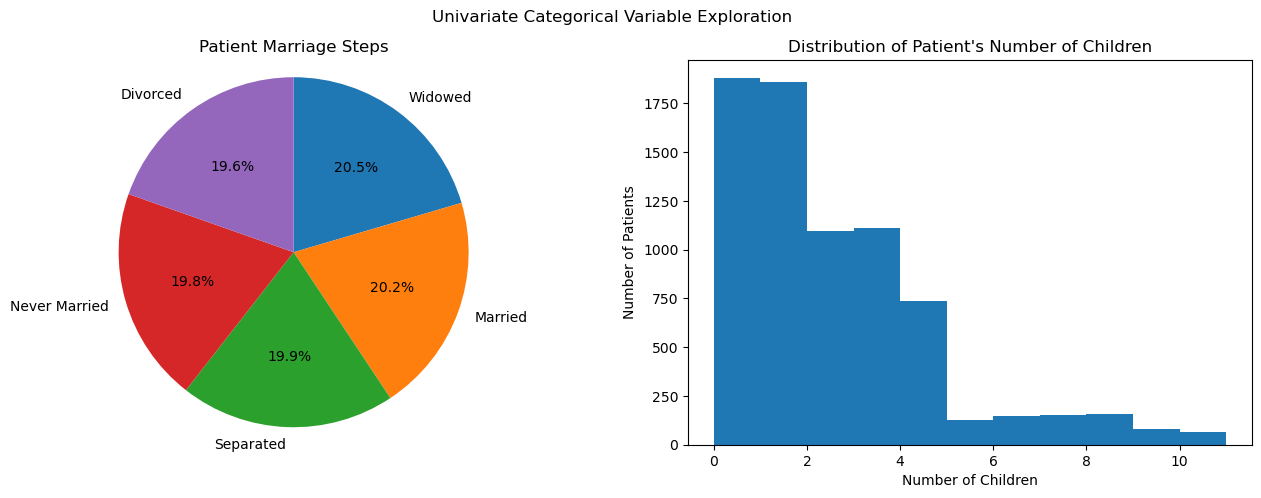

In [14]:
plt.figure(figsize = [16,5])
plt.suptitle("Univariate Categorical Variable Exploration")

# left: Univariate marital
plt.subplot(1, 2, 1)
plt.title("Patient Marriage Steps")
comp_risk_counts = df["Marital"].value_counts()
comp_risk_labels = ["Divorced", "Married", "Low", "Widowed","Separated", "Divorced"]
plt.pie(comp_risk_counts, labels=comp_risk_counts.index, autopct='%1.1f%%', startangle=90, counterclock = False)
plt.axis('square');

# right: Univariate exploration of  Children 
plt.subplot(1, 2, 2)
plt.title("Distribution of Patient's Number of Children")
bins = np.arange(0, df["Children"].max()+2, 1)
plt.hist(data=df, x = "Children", bins=bins)
plt.xlabel("Number of Children")
plt.ylabel("Number of Patients");

In [15]:
df.Marital.value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [16]:
df.Marital.value_counts().sort_index()

Marital
Divorced         1961
Married          2023
Never Married    1984
Separated        1987
Widowed          2045
Name: count, dtype: int64

In [17]:
df.Marital.describe()

count       10000
unique          5
top       Widowed
freq         2045
Name: Marital, dtype: object

In [18]:
df.Children.value_counts()

Children
0.0     1880
1.0     1858
3.0     1113
2.0     1094
4.0      739
8.0      157
7.0      154
6.0      145
5.0      126
9.0       83
10.0      63
Name: count, dtype: int64

In [19]:
df.Children.value_counts().sort_index()

Children
0.0     1880
1.0     1858
2.0     1094
3.0     1113
4.0      739
5.0      126
6.0      145
7.0      154
8.0      157
9.0       83
10.0      63
Name: count, dtype: int64

In [20]:
df.Children.describe()

count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

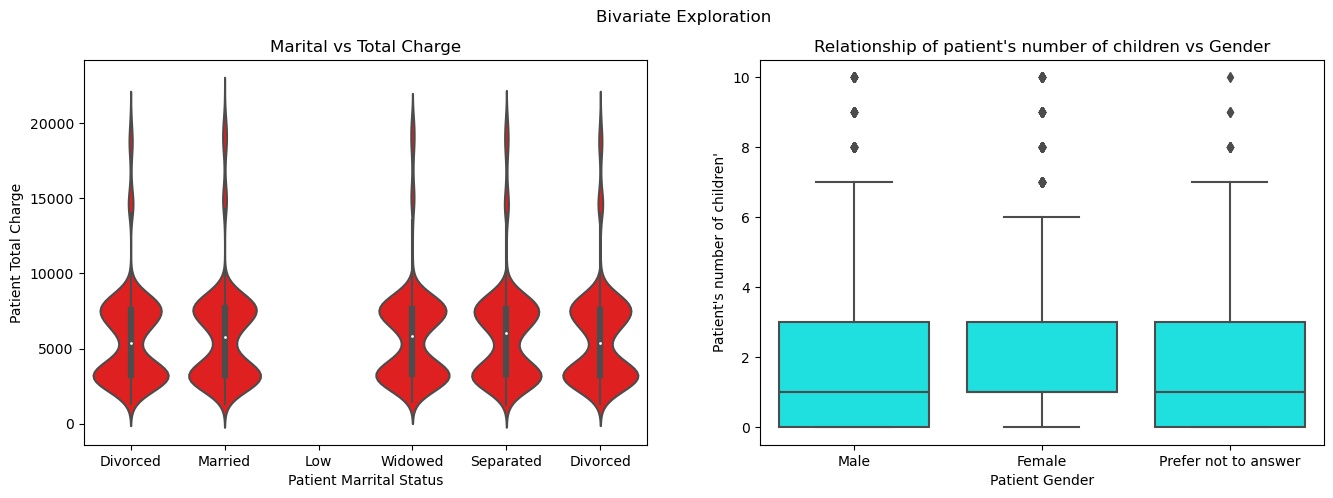

In [21]:
plt.figure(figsize = [16,5])
plt.suptitle("Bivariate Exploration")

# LEFT : Bivariate exploration of marital vs total charge
plt.subplot(1, 2, 1)
plt.title('Marital vs Total Charge')
plot_order = ["Divorced", "Married", "Low", "Widowed","Separated", "Divorced"]
sns.violinplot(data= df, x= "Marital", y= "TotalCharge", color= "red", order=plot_order)
plt.xlabel('Patient Marrital Status')
plt.ylabel("Patient Total Charge");

# right plot: Bivariate exploration of Gender  & children 
plt.subplot(1, 2, 2)
plt.title("Relationship of patient's number of children vs Gender")
sns.boxplot(data=df, x= "Gender", y = "Children", color= "cyan")
plt.xlabel("Patient Gender")
plt.ylabel("Patient's number of children'");

In [22]:
df.Gender.value_counts()

Gender
Female                  5018
Male                    4768
Prefer not to answer     214
Name: count, dtype: int64

In [23]:
df.Gender.describe()

count      10000
unique         3
top       Female
freq        5018
Name: Gender, dtype: object